# Исследование стартапов
* Автор: Кокорин Максим
* Дата: 23.07.2025

## Цели и задачи проекта

Выяснить, какие стартапы будут являться перспективными для покупки и их дальнейшей продажи.


Задачи:
* по каким столбцам можно объединять данные из разных таблиц;
* можно ли доверять данным о сотрудниках стартапов и их образовании;
* что означают покупки за 0 или за 1 доллар;
* какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
* как рассчитать и отобразить численные показатели и динамику.

## Содержимое проекта
* Знакомство с данными: загрузка и первичная предобработка
* Предобработка данных, предварительное исследование
* Исследовательский анализ объединённых таблиц
* Итоговый вывод и рекомендации

## Знакомство с данными: загрузка и первичная предобработка

### Вывод общей информации, исправление названия столбцов

In [1]:
# Импортируем нужные для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# Запишем общий одинаковый путь для всех датафреймов в переменную PATH
PATH = "..."

In [3]:
# Сохраним датафрейм acquisition.csv в переменную acquisition
acquisition = pd.read_csv(PATH + 'acquisition.csv')
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датафрейм `acquisition` состоит из 9407 строк и 6 столбцов. Он содержит информацию о покупках одними компаниями других компаний:
* `id` — идентификатор покупки,
* `acquiring_company_id` — идентификатор покупающей компании,
* `acquired_company_id` — идентификатор покупаемой компании,
* `term_code` — варианты расчёта,
* `price_amount` — сумма сделки,
* `acquired_at` — дата сделки.

Пропуски содержатся в столбцах `term_code` и `acquired_at`. Значения столбцов представлены типами данных `int64` и `object`. Датафрейм занимает 441 КБ.

In [4]:
# Посмотрим на первые строки датафрейма
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [5]:
# Получим статистические показатели по числовым столбцам
acquisition.describe()

,id,acquiring_company_id,acquired_company_id,price_amount
count,9407.000000,9407.000000,9407.000000,9.407000e+03
mean,5256.981822,49787.284575,71693.030722,3.932965e+08
std,3005.794674,69060.422026,73026.433729,2.682198e+10
min,1.000000,4.000000,4.000000,0.000000e+00
25%,2682.500000,3246.000000,23124.000000,0.000000e+00
50%,5178.000000,26107.000000,45126.000000,0.000000e+00
75%,7841.500000,56151.000000,81203.000000,2.343200e+04
max,10529.000000,285984.000000,286176.000000,2.600000e+12


Можно уменьшить разряд типов данных в столбцах `id`, `acquiring_company_id`, `acquired_company_id` и изменить тип данных на дату для поля `acquired_at`.

In [6]:
company_and_rounds = pd.read_csv(PATH + 'company_and_rounds.csv')
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датафрейм `company_and_rounds` состоит из 217774 строк и 22 строк. Он содержит информацию о компаниях и раундах финансирования:
* `company ID` — идентификатор компании.
* `name` — название компании.
* `category code` — категория области деятельности компании.
* `status` — статус компании.
* `founded at` — дата инвестирования.
* `closed at` — дата закрытия компании.
* `domain` — официальный сайт компании.
* `network username` — ник компании в сети.
* `country code` — код страны компании.
* `investment rounds` — число инвестиционных раундов.
* `funding rounds` — число раундов финансирования.
* `funding total` — сумма финансирования.
* `milestones` — вехи финансирования.
* `funding round id` — идентификатор этапа финансирования.
* `company id` — идентификатор компании.
* `funded at` — дата финансирования.
* `funding round type` — тип финансирования.
* `raised amount` — сумма финансирования.
* `pre money valuation` — предварительная денежная оценка.
* `participants` — число участников.
* `is first round` — является ли раунд первым.
* `is last round` — является раунд последним.

Пропуски содержатся во всех столбцах. Нужно исправить стиль написания на `snake_case`. Значения столбцов представлены типами данных `float64` и `object`. Датафрейм занимает 36.6 МБ.

In [7]:
company_and_rounds.head().T

,0,1,2,3,4
company ID,1.0,1.0,1.0,10.0,100.0
name,Wetpaint,Wetpaint,Wetpaint,Flektor,There
category code,web,web,web,games_video,games_video
status,operating,operating,operating,acquired,acquired
founded at,2005-10-17,2005-10-17,2005-10-17,NaN,NaN
closed at,NaN,NaN,NaN,NaN,NaN
domain,wetpaint-inc.com,wetpaint-inc.com,wetpaint-inc.com,flektor.com,there.com
network username,BachelrWetpaint,BachelrWetpaint,BachelrWetpaint,NaN,NaN
country code,USA,USA,USA,USA,USA
investment rounds,0.0,0.0,0.0,0.0,0.0


In [8]:
company_and_rounds.describe()

,company ID,investment rounds,funding rounds,funding total,milestones,funding round id,company id,raised amount,pre money valuation,participants,is first round,is last round
count,217472.000000,217472.000000,217472.000000,2.174720e+05,217472.000000,52928.000000,52928.000000,5.292800e+04,5.292800e+04,52928.000000,52928.000000,52928.000000
mean,145287.383723,0.037711,0.612171,5.996191e+06,0.650442,28962.894536,98490.888433,7.946092e+06,3.294525e+05,1.528567,0.604576,0.604538
std,91998.156087,1.962712,1.433500,4.893160e+07,0.826408,16821.871803,88429.084864,4.216821e+07,6.531803e+07,2.060192,0.488946,0.488954
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,51960.750000,0.000000,0.000000,0.000000e+00,0.000000,14343.750000,26598.000000,2.463300e+05,0.000000e+00,0.000000,0.000000,0.000000
50%,165262.500000,0.000000,0.000000,0.000000e+00,0.000000,28885.500000,58080.000000,1.600000e+06,0.000000e+00,1.000000,1.000000,1.000000
75%,228199.250000,0.000000,0.000000,0.000000e+00,1.000000,43561.250000,171610.750000,6.700000e+06,0.000000e+00,2.000000,1.000000,1.000000
max,286215.000000,478.000000,15.000000,5.700000e+09,9.000000,57952.000000,286215.000000,3.835050e+09,1.500000e+10,36.000000,1.000000,1.000000


У столбцов с числовыми значениями можно уменьшить разряд, а поле `funded at` заменить на дату.

In [9]:
# Создаим функцию snake_case для изменения написания стиля названий столбцов
def snake_case(column_name):
    return column_name.replace('  ', '_')

In [10]:
# Применим функцию snake_case к датафрейму company_and_rounds
company_and_rounds.columns = list(pd.Series(company_and_rounds.columns).apply(snake_case))
# Проверим результат
company_and_rounds.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [11]:
education = pd.read_csv(PATH + 'education.csv')
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датафрейм `education` состоит из 109610 строк и 4 столбцов. Он содержит информацию об образовании сотрудника:
* `id` — идентификатор записи об образовании,
* `person_id` — идентификатор работника,
* `instituition` — название учебного заведения,
* `graduated_at` — дата получения образования.

Пропуски содержатся в столбцах `instituition` и `graduated_at`. Значения столбцов представлены типами данных `int64` и `object`. Датафрейм занимает 3.3 МБ.

In [12]:
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [13]:
education.describe()

,id,person_id
count,109610.00000,109610.000000
mean,54805.50000,152625.077429
std,31641.82584,83943.634014
min,1.00000,2.000000
25%,27403.25000,72994.750000
50%,54805.50000,180628.500000
75%,82207.75000,227104.750000
max,109610.00000,268589.000000


Можно уменьшить разрядность в столбцах с числовым типом данных и изменить тип данных поля `graduated_at` на дату.

In [14]:
people = pd.read_csv(PATH + 'people.csv')
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датафрейм `people` состоит из 226709 строк и 5 столбцов. Он содержит информацию о сотрудниках:
* `id` — идентификатор сотрудника,
* `first_name` — имя сотрудника,
* `last_name` — фамилия сотрудника,
* `company_id` — идентификатор компании,
* `network_username` — ник в социальных сетях.

Пропуски содержатся в столбцах `first_name`, `last_name`, `company_id`, `network_username`. Значения столбцов представлены типами данных `int64`, `object` `float64`. Датафрейм занимает 8.6 МБ.

In [15]:
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [16]:
people.describe()

,id,company_id
count,226709.000000,34615.000000
mean,135421.343921,83338.840012
std,79749.283786,84316.535268
min,2.000000,1.000000
25%,63355.000000,9771.500000
50%,138864.000000,51837.000000
75%,206548.000000,158522.000000
max,268593.000000,286091.000000


Можно уменьшить разряд числового столбца.

In [17]:
degrees = pd.read_csv(PATH + 'degrees.csv')
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датафрейм `degrees` состоит из 109610 строк и 4 столбцов. Он содержит информацию о типе образования сотрудника:
* `id` — идентификатор записи,
* `object_id` — идентификатор сотрудника,
* `degree_type` — тип образования,
* `subject` — специальность.

Пропуски содержатся в столбцах `degree_type` и `subject`. Значения столбцов представлены типами данных `int64` и `object`. Датафрейм занимает 3.3 МБ.

In [18]:
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [19]:
degrees.describe()

,id
count,109610.00000
mean,54805.50000
std,31641.82584
min,1.00000
25%,27403.25000
50%,54805.50000
75%,82207.75000
max,109610.00000


Можно уменьшить разряд в столбце `id`.

### Смена типов и анализ пропусков

In [20]:
# Изменим типы данных у 4 столбцов
for column in ['id', 'acquiring_company_id', 'acquired_company_id']:
    acquisition[column] = pd.to_numeric(acquisition[column], downcast='integer')

acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'], errors='coerce')
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int16         
 1   acquiring_company_id  9407 non-null   int32         
 2   acquired_company_id   9407 non-null   int32         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2), int64(1), object(1)
memory usage: 312.5+ KB


Благодаря преоразованию типов размер датафрейма сократился на 129 КБ.

In [21]:
# Проверим абсолютное и относительное количество пропусков
acquisition.isna().agg(['sum', 'mean']).T

,sum,mean
id,0.0,0.000000
acquiring_company_id,0.0,0.000000
acquired_company_id,0.0,0.000000
term_code,7576.0,0.805358
price_amount,0.0,0.000000
acquired_at,29.0,0.003083


80% пропусков содержится в столбце `term_code` (варианты расчёта) и 29 пропусков из 9407 строк есть в `acquired_at` (дата сделки). Во втором столбце количество пропусков менее 1%, поэтому их можно оставить. Данные первого столбца для дальнейшего анализа не понадобятся, поэтому их так же можно оставить.

In [22]:
# Оптимизируем тип данных для 13 столбцов
for column in ['company_ID', 'investment_rounds', 'funding_rounds', 'funding_total',
               'milestones', 'funding_round_id', 'company_id', 'raised_amount',
               'pre_money_valuation', 'participants', 'is_first_round',
               'is_last_round']:
    company_and_rounds[column] = pd.to_numeric(company_and_rounds[column], errors='coerce', downcast='float')

company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'], errors='coerce')

# Проверим результат
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float32       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  object        
 5   closed_at            3449 non-null    object        
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float32       
 10  funding_rounds       217472 non-null  float32       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float32       
 13  funding_round_

В результате преобразований типов данных размер датафрейма уменьшился на 7.5 МБ.

In [23]:
# Найдем абсолютное и относительное число пропусков
company_and_rounds.isna().agg(['sum', 'mean']).T

,sum,mean
company_ID,302.0,0.001387
name,303.0,0.001391
category_code,73888.0,0.339288
status,302.0,0.001387
founded_at,107818.0,0.495091
closed_at,214325.0,0.984162
domain,70615.0,0.324258
network_username,122240.0,0.561316
country_code,109167.0,0.501286
investment_rounds,302.0,0.001387


В 7 столбцах пропуски занимают менее 1%, в столбцах `category_code` (категория области деятельности компании), `founded_at` (дата инвестирования), `domain` (официальный сайт компании) количество пропусков от 32% до 50%. В 9 столбцах пропуски составляют 75%. В столбце `closed_at` 98% пропусков (дата закрытия компании), что говорит о том, что 98% компаний открыты, поэтому их можно оставить. Категория области деятельности компании может быть не указана, поэтому пропуски здесь так же оставим. Поле `founded_at`, `domain`, `network_username`, `country_code` для дальнейшего анализа не потребуется, оставим его без изменений. У 9 оставшихся столбцов ровно одинаковое число пропусков — 75%. Однако нам для работы эти столбцы не понадобятся, поэтому можно создадим новый датафрейм без них.

In [24]:
education['id'] = pd.to_numeric(education['id'], downcast='integer')
education['graduated_at'] = pd.to_datetime(education['graduated_at'], errors='coerce')

education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int32         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.9+ MB


В результате преобразования типов данных размер датафрейма сократился на 819.2 КБ.

In [25]:
# Проверим наличие пропусков
education.isna().agg(['sum', 'mean']).T

,sum,mean
id,0.0,0.000000
person_id,0.0,0.000000
instituition,55.0,0.000502
graduated_at,51556.0,0.470359


Менее 1% пропусков содержится в столбце `instituition` (название учебного заведения). В столбце `graduated_at` (дата получения образования) 47% пропусков.

In [26]:
people['company_id'] = pd.to_numeric(people['company_id'], errors='coerce', downcast='float')

people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float32
 4   network_username  38867 non-null   object 
dtypes: float32(1), int64(1), object(3)
memory usage: 7.8+ MB


За счет изменения типов данных получилось уменьшить размер датафрейма на 1.7 МБ.

In [27]:
# Проверим наличие пропусков
people.isna().agg(['sum', 'mean']).T

,sum,mean
id,0.0,0.000000
first_name,9.0,0.000040
last_name,4.0,0.000018
company_id,192094.0,0.847315
network_username,187842.0,0.828560


В столбцах `first_name` (имя сотрудника) и `last_name` (фамилия сотрудника) пропуски составляют менее 1%, а вот в столбцах `company_id` (идентификатор компании) и `network_username` (ник в социальных сетях) 84% и 82% пропусков соответственно.

In [28]:
degrees['id'] = pd.to_numeric(degrees['id'], downcast='integer')
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int32 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int32(1), object(3)
memory usage: 2.9+ MB


Размер датафрейма уменьшился на 409.6 КБ.

In [29]:
degrees.isna().agg(['sum', 'mean']).T

,sum,mean
id,0.0,0.000000
object_id,0.0,0.000000
degree_type,11221.0,0.102372
subject,28312.0,0.258298


В столбцах `degree_type` (тип образования) и `subject` (специальность) есть 10% и 25% пропусков соответственно.

## Предобработка данных, предварительное исследование

### Раунды финансирования по годам

In [30]:
# Создадим сводную таблицу по годам
pv_table_fund_round = pd.pivot_table(company_and_rounds, index=company_and_rounds['funded_at'].dt.year, values=['raised_amount', 'funding_rounds'], aggfunc={'raised_amount': ['median', 'count'], 'funding_rounds': 'sum'})
# Оставим только данные, число раундов финансирования которых превышает 50
pv_table_fund_round = pv_table_fund_round[pv_table_fund_round['funding_rounds']['sum'] > 50]
pv_table_fund_round

funding_rounds raised_amount           
                     sum         count     median
funded_at                                        
1998.0              72.0            29   100000.0
1999.0             268.0            76  2000000.0
2000.0             403.0           125  4200000.0
2001.0             302.0            96  3000000.0
2002.0             385.0           116  4200000.0
2003.0             569.0           159  3000000.0
2004.0            1057.0           291  5000000.0
2005.0            4157.0          1633  5500000.0
2006.0            6295.0          2436  5000000.0
2007.0            8494.0          3279  3973320.0
2008.0            9931.0          3774  3110000.0
2009.0           11857.0          4151  2000000.0
2010.0           16913.0          6221  1602500.0
2011.0           23503.0          9204  1200000.0
2012.0           24549.0          9970  1000000.0
2013.0           23978.0         11072  1200000.0

<Figure size 800x400 with 0 Axes>

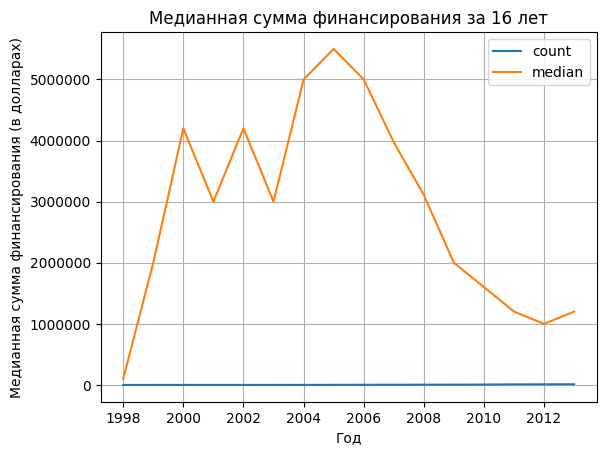

In [31]:
# Построим линейный график на основе полученной таблицы
plt.figure(figsize=(8, 4))
ax = pv_table_fund_round.reset_index().plot(x='funded_at',
                         y='raised_amount',
                         grid=True,
                                      xlabel='Год',
                                      ylabel='Медианная сумма финансирования (в долларах)',
                                      legend=True,
                                      title='Медианная сумма финансирования за 16 лет')

ax.ticklabel_format(style='plain', axis='y')

Типичный размер собранных в рамках одного раунда средств был максимален в 2005 году. В 2013 году количество раундов финансирования было чуть меньше, чем в 2012, однако всё равно одно из самых больших. Медианная сумма финансирования вновь пошла вверх после спада в 2012 году.

### Люди и их образование

In [32]:
# Объединим датафреймы people и education и сохраним в новый датафрейм — people_edu
people_edu = people.merge(education, left_on='id', right_on='person_id', how='left')

# Переименуем одноименные столбцы для удобства
people_edu = people_edu.rename(columns={'id_x': 'id_employee', 'id_y': 'id_education'})

# Создади датафреймы, в котором есть информация об образования и в котором она отсутствует
count_empl_0 = pd.DataFrame(people_edu[(people_edu['instituition'].isna()) & (people_edu['graduated_at'].isna())].groupby('company_id')['id_employee'].count()).reset_index()
count_empl_1 = pd.DataFrame(people_edu[(people_edu['instituition'].notna()) & (people_edu['graduated_at']).notna()].groupby('company_id')['id_employee'].count()).reset_index()

# Объединим полученные датафреймы
comp_count_empl = count_empl_0.merge(count_empl_1, on='company_id')

# Переименуем одноименные столбцы
comp_count_empl = comp_count_empl.rename(columns={'id_employee_x': 'count_empl_not_edu', 'id_employee_y': 'count_empl_edu'})

# Создадим столбец, в котором будет указано общее число сотрудников
comp_count_empl['sm_empl'] = comp_count_empl['count_empl_not_edu'] + comp_count_empl['count_empl_edu']

# Добавим столбец с группой, которая зависит от количества сотрудников
comp_count_empl['group_sm_empl'] = pd.cut(x=comp_count_empl['sm_empl'], bins=3, labels=['Маленькое число сотрудников', 'Среднее число сотрудников', 'Большое число сотрудников'])

# Сгруппируем данные по получившимся группам
comp_count_empl = comp_count_empl.groupby('group_sm_empl')[['count_empl_not_edu', 'sm_empl']].sum()

# Добавим новый столбец для вычисления относительного числа сотрудников без указания информации об образовании
comp_count_empl['shape_empl_not_edu'] = comp_count_empl['count_empl_not_edu'] / comp_count_empl['sm_empl']

comp_count_empl

C:\Users\mokok\AppData\Local\Temp\ipykernel_4004\3471731225.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comp_count_empl = comp_count_empl.groupby('group_sm_empl')[['count_empl_not_edu', 'sm_empl']].sum()


,count_empl_not_edu,sm_empl,shape_empl_not_edu
group_sm_empl,,,
Маленькое число сотрудников,3822,9037,0.422928
Среднее число сотрудников,77,306,0.251634
Большое число сотрудников,76,271,0.280443


Датафрейм `degrees` содержит поле `object_id`, которое отвечает за идентификатор сотрудника, однако в нём представлены текстовые данные формата `p:...`, а в таблице `people_edu` столбец идентификатора сотрудника `id_employee` имеет целочисленный формат, поэтому объединить их не получится. 

In [33]:
# Проверим данные столбца id_employee
set(people_edu['id_employee'].unique())

{2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 49,
 51,
 52,
 53,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 89,
 90,
 92,
 93,
 94,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 122,
 123,
 124,
 125,
 127,
 128,
 129,
 130,
 132,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 2

In [34]:
# Проверим данные столбца object_id
set(degrees['object_id'].unique())

{'p:170598',
 'p:69692',
 'p:196984',
 'p:224159',
 'p:243958',
 'p:252564',
 'p:23301',
 'p:23693',
 'p:224912',
 'p:23814',
 'p:191194',
 'p:234550',
 'p:201317',
 'p:209773',
 'p:42194',
 'p:94788',
 'p:78990',
 'p:240103',
 'p:192999',
 'p:197489',
 'p:153008',
 'p:54755',
 'p:77489',
 'p:23329',
 'p:195150',
 'p:247115',
 'p:50736',
 'p:112904',
 'p:241566',
 'p:31877',
 'p:209243',
 'p:176360',
 'p:186019',
 'p:233054',
 'p:25005',
 'p:244364',
 'p:103973',
 'p:90173',
 'p:30307',
 'p:255314',
 'p:203441',
 'p:94609',
 'p:12058',
 'p:116318',
 'p:215141',
 'p:199135',
 'p:177524',
 'p:205972',
 'p:48588',
 'p:106049',
 'p:248324',
 'p:153909',
 'p:265488',
 'p:57935',
 'p:224590',
 'p:243315',
 'p:250309',
 'p:154408',
 'p:240069',
 'p:161578',
 'p:97970',
 'p:87772',
 'p:108985',
 'p:246162',
 'p:228885',
 'p:266241',
 'p:51728',
 'p:27394',
 'p:53617',
 'p:265086',
 'p:32588',
 'p:208833',
 'p:238355',
 'p:264025',
 'p:266350',
 'p:267482',
 'p:196073',
 'p:184540',
 'p:238193'

### Объединять или не объединять — вот в чём вопрос

Поле `network_username` содержится в двух датафреймах — `company_and_rounds` и `people`. По описанию данных в первом датафрейме столбец отвечает за ник компании в сети, а во втором за ник в социальных сетях. Проверим, есть ли совпадения среди двух столбцов.

In [35]:
# Создадим множества, состоящие из знчений network_username разных датафреймов
network_username_company_set = set(company_and_rounds[company_and_rounds['network_username'].notna()]['network_username'].unique())
network_username_people_set = set(people[people['network_username'].notna()]['network_username'].unique())

# Выведем длину первого, второго множеств и результат их пересечения
len(network_username_company_set), len(network_username_people_set), len(network_username_company_set & network_username_people_set)

(79571, 38421, 2199)

Так как в первом множестве 79571 строка, во втором 38421, а в пересечении только 2199 строк, то в столбцах разные данные. В датафрейме `company_and_rounds` это ник компании в сети, а в датафрейме `people` это ник сотрудника в сети, поэтому по этим столбцам объединять датасеты не получится.

### Проблемный датасет и причина возникновения пропусков

In [36]:
# Создадим датафрейм company_and_rounds_edit, который будет всключать только нужные столбцы
company_and_rounds_edit = company_and_rounds[['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']]
# Выведем первые несколько строк для проверки
company_and_rounds_edit.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0


In [37]:
# Проверим датафрейм на наличие дубликатов
company_and_rounds_edit.duplicated().sum()

21220

In [38]:
# Удалим дубликаты из датафрейма
company_and_rounds_edit = company_and_rounds_edit.drop_duplicates()
company_and_rounds_edit

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaN,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0
217468,174536.0,Pphotonet,games_video,operating,2012-05-01,NaN,pPhotonet.co,pPhotonet,NaN,0.0,0.0,0.0,0.0
217469,43233.0,Photonet,photo_video,acquired,2010-03-01,NaN,Photonet.com,Photonet,USA,0.0,3.0,57500000.0,3.0


## Шаг 3. Исследовательский анализ объединённых таблиц

### Объединение данных

In [39]:
# Отберем только те данные, в которых получение финансирования или инвестиций больше нуля или со статусом компании равным acquired 
company_and_rounds_edit = company_and_rounds_edit[(company_and_rounds_edit['funding_rounds'] > 0) | (company_and_rounds_edit['investment_rounds'] > 0) | (company_and_rounds_edit['status'] == 'acquired')]
company_and_rounds_edit

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaN,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaN,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217458,1344.0,Vobile,web,operating,2005-01-01,NaN,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0
217459,142181.0,Stop Being Watched,software,operating,2010-06-10,NaN,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0,1.0
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaN,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0


### Анализ выбросов

Text(0.5, 1.0, 'Распределение объемов финансирования')

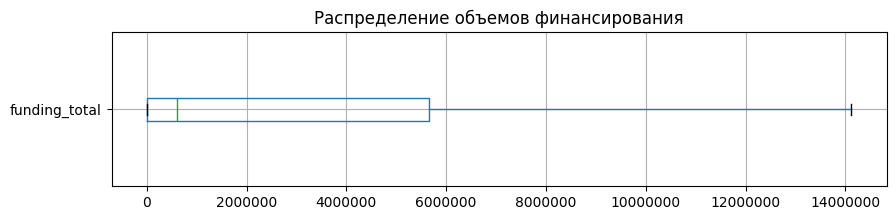

In [40]:
# Построим диаграмму размаха для проверки распределения объемов финансирования
plt.figure(figsize=(10, 2))

ax = company_and_rounds_edit.boxplot(column='funding_total', vert=False, showfliers=False)
ax.ticklabel_format(style='plain', axis='x')

plt.title('Распределение объемов финансирования')

In [41]:
pd.set_option('display.float_format', '{:.2f}'.format)
company_and_rounds_edit['funding_total'].describe()

count        40747.00
mean      10135609.64
std       56464359.98
min              0.00
25%              0.00
50%         600000.00
75%        5650650.00
max     5700000000.00
Name: funding_total, dtype: float64

25% всех значений равны нулю. Медиана составляет 600000. 75% значений меньше 5650650. Выбросами для данных по диаграмме будут считаться значения около 15000000 и больше. Обычные способы нахождения типичных значений для данных не подойдут, так как на диаграмме мы видим большое число выбросов, которые, возможно, на самом деле ими не являются. Медиана очень далека от максимального значения. Среднее составляет 10135609.64, что намного больше медианы. Это говорит о том, что размах очень большой (стандартное отклонение равно 56464359.98), а минимальное значение и 25 процентиль равны нулю.

### Куплены забесплатно?

In [42]:
# Объединим датафреймы acquisition и company_and_rounds_edit и сохраним получившийся в переменной acq_company_and_rounds_edit
acq_company_and_rounds_edit = acquisition.merge(company_and_rounds_edit, left_on='acquired_company_id', right_on='company_ID', how='inner')

# Отберем те компании, которые были куплены за 0 или 1 доллар и имеют ненулевую сумму финансирования
acq_company_and_rounds_edit[((acq_company_and_rounds_edit['price_amount'] == 0) | (acq_company_and_rounds_edit['price_amount'] == 1)) & (acq_company_and_rounds_edit['funding_total'] > 0)]

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
7,14,318,314,cash,0,2006-10-01,314.00,Reddit,web,acquired,2005-01-01,NaN,reddit.com,reddit,USA,0.00,1.00,100000.00,3.00
51,65,146,698,cash,0,2007-08-01,698.00,Maya's Mom,web,acquired,NaN,NaN,mayasmom.com,NaN,USA,0.00,1.00,1000000.00,2.00
53,67,156,718,cash,0,2007-08-01,718.00,Glimpse,ecommerce,acquired,NaN,NaN,glimpse.com,NaN,USA,0.00,1.00,4000000.00,0.00
67,9121,415,997,NaN,0,2013-07-15,997.00,Zimbra,enterprise,acquired,2003-01-01,NaN,zimbra.com,zimbra,USA,0.00,1.00,14500000.00,3.00
68,87,1035,175,cash,0,2007-10-01,175.00,Newsvine,web,acquired,2005-03-31,NaN,newsvine.com,NaN,USA,0.00,1.00,1250000.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9346,10481,29,165128,NaN,0,2013-12-06,165128.00,EvntLive,music,acquired,NaN,NaN,evntliveinc.com,EVNTLIVE,USA,0.00,1.00,2300000.00,2.00
9365,10500,42365,79582,NaN,0,2013-12-10,79582.00,lucierna,software,acquired,2009-05-22,NaN,lucierna.com,lucierna_inc,ESP,0.00,1.00,2106600.00,0.00
9368,10503,1434,60436,NaN,0,2013-12-10,60436.00,Cloudmeter,enterprise,acquired,2007-04-01,NaN,cloudmeter.com,cloudmeter,USA,0.00,1.00,5000000.00,2.00
9371,10507,29,169154,NaN,0,2013-12-09,169154.00,Quik.io,software,acquired,2011-02-03,NaN,quik.io,quik_io,USA,0.00,2.00,1280000.00,2.00


Получили список компаний, которые были куплены за 0 или 1 доллар. Их 1618 штук.

In [43]:
# Сохраним статистические показатели для поля funding_total в новую переменную acq_company_and_rounds_edit_desc
acq_company_and_rounds_edit_desc = acq_company_and_rounds_edit[((acq_company_and_rounds_edit['price_amount'] == 0) | (acq_company_and_rounds_edit['price_amount'] == 1)) & (acq_company_and_rounds_edit['funding_total'] > 0)]['funding_total'].describe()

# Найдем первый и третий процентили
Q1 = acq_company_and_rounds_edit_desc['25%']
Q3 = acq_company_and_rounds_edit_desc['75%']

# Вычислим IQR
IQR = Q3 - Q1

# Посчитаем нижнюю и верхнюю границы по формуле
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Нижняя граница: {lower_bound}, верхняя граница: {upper_bound}')
print(f'91 процентиль соответствует верхней границе, его значение равно {acq_company_and_rounds_edit[((acq_company_and_rounds_edit["price_amount"] == 0) | (acq_company_and_rounds_edit["price_amount"] == 1)) & (acq_company_and_rounds_edit["funding_total"] > 0)]["funding_total"].quantile(0.91)}')
print(f'Нулевой процентиль соответсвует нижней границе, его значение равно {acq_company_and_rounds_edit[((acq_company_and_rounds_edit["price_amount"] == 0) | (acq_company_and_rounds_edit["price_amount"] == 1)) & (acq_company_and_rounds_edit["funding_total"] > 0)]["funding_total"].quantile(0)}')

Нижняя граница: -18250000.0, верхняя граница: 35750000.0
91 процентиль соответствует верхней границе, его значение равно 35894000.00000001
Нулевой процентиль соответсвует нижней границе, его значение равно 3750.0


Так как нижнее значение границы получилось отрицательным, его можно считать нулевым и самое близкое к нему число будет соответствовать нулевому процентилю.

### Цены стартапов по категориям

In [44]:
# Создадим датафрейм на основе acq_company_and_rounds_edit, в котором данные будут сгруппированы по категории области деятельности компании
startup_prices_category = pd.DataFrame(acq_company_and_rounds_edit[(acq_company_and_rounds_edit['price_amount'] > 0) & (acq_company_and_rounds_edit['price_amount'] < acq_company_and_rounds_edit['price_amount'].quantile(0.9))].groupby('category_code')['price_amount'].agg(['mean', 'max', 'min'])).reset_index()

# Создадим новый столбец, в котором будет указан размах. Его считаем как разницу между максимальным и минимальным значениями
startup_prices_category['scope'] = startup_prices_category['max'] - startup_prices_category['min']

# Выведем топ-10 областей деятельности компании по средней сумме сделки
startup_prices_category[['category_code', 'mean', 'scope']].sort_values(by=['mean', 'scope'], ascending=[False, False]).head(10)

,category_code,mean,scope
9,fashion,97500000.00,0
1,analytics,80000000.00,0
13,health,62875000.00,97500000
18,messaging,54750000.00,100000000
4,cleantech,46702142.86,109550000
24,photo_video,46625000.00,23500000
10,finance,45118750.00,111800000
2,automotive,43000000.00,0
28,security,40865384.62,93150000
27,search,40015384.62,114950000


На первой строчке оказалась категория моды, на второй аналитики, на третьей здоровье. Самый большой размах цен у поиска, равен нулю у моды, аналитики и автомобилей.

### Сколько раундов продержится стартап перед покупкой

In [45]:
# Выведем статистические показатели по числу раундов финансирования
company_and_rounds_edit['funding_rounds'].describe()

count   40747.00
mean        1.29
std         1.26
min         0.00
25%         1.00
50%         1.00
75%         2.00
max        15.00
Name: funding_rounds, dtype: float64

Среднее и медиана приблизительно одинаковы (1.29 и 1.00 соответственно), что говорит о равномерном распределении данных. Однако выбросы все равно есть — максимальное число раундов составляет 15.

In [46]:
# Посмотрим на среднее число раундов финансирования для каждого статуса компании
company_and_rounds_edit.groupby('status')['funding_rounds'].mean()

status
acquired    0.52
closed      1.38
ipo         1.93
operating   1.52
Name: funding_rounds, dtype: float32

<Axes: title={'center': 'Среднее число раундов финансирования для разных статусов компаний'}, xlabel='Статус компании', ylabel='Среднее число раундов финансирования'>

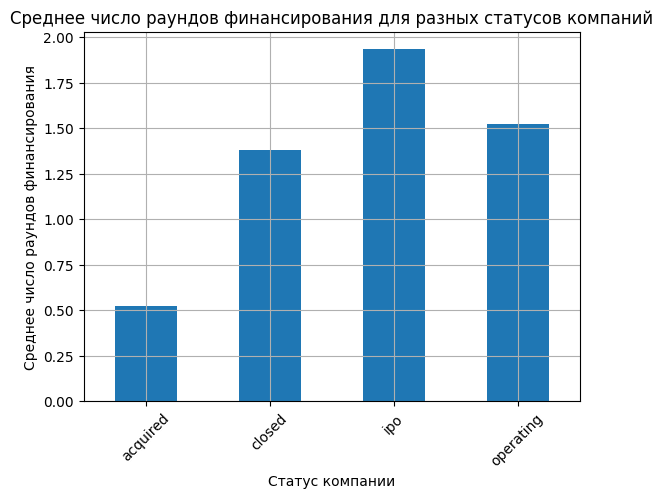

In [47]:
# Построим столбчатую диаграмму по полученным результатам

company_and_rounds_edit.groupby('status')['funding_rounds'].mean().plot(kind='bar',
                                                                        grid=True,
                                                                        rot=45,
                                                                        xlabel='Статус компании',
                                                                        ylabel='Среднее число раундов финансирования',
                                                                        title='Среднее число раундов финансирования для разных статусов компаний')

У acquired число раундов минимально — 0.5, у closed — 1.38, у ipo — максимально 1.93, у operating — 1.52. Первичное размещение на биржевом рынке требует больше всего раундов финансирования, а приобретение компании меньше всего.

## Итоговый вывод и рекомендации

По итогам работы провели знакомство с данными, где нужно изменили стиль написания столбцов, изменили типы данных, удалили неактуальные для исследования столбцы и сохранили пропуски в полях для большей целостности данных, составили сводную таблицу с характерной суммой финансирования и числом раундов финансирования, построили по этой таблице линейный график медианной суммы финансирования за 16 лет, разделили компании на три группы в зависимости от количества сотрудников и нашли для них долю людей без указания информации об образовании, узнали о невозможности объединения датафреймов по полю  network_username, обработали датафрейм company_and_rounds_edit, удалив лишние столбцы и дубликаты, отфильтровали данные по необходимым условиям, проанализировали распределение объемов финансирования, изучили список компаний, купленных за 0 долларов, цены стартапов по категориям и среднее число раундов финансирования для каждого статуса компании.

Рекомендации: стоит обратить внимание на число раундов финансирования — если число маленькое, то это acquired, а если большое, то ipo. Самые большие сделки по стоимости зафиксированы у категорий моды, аналитики и здоровья, что говорит об их возможном высоком потенциале роста. Объемы финансирования нужно учитывать в диапазоне от 600000 от 6000000.

Предварительно обработав датасеты, из некоторых из них можно извлечь полезную информацию.